In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lombscargle

In [24]:
def get_df(times):
    # this work only for N even
    return 0.2 / (max(times) - min(times))

def Nf(times, nyq):
    return nyq / get_df(times)

def get_all_k(times, nyq):
    # here nu_k = k * df
    N = Nf(times, nyq)
    return np.linspace(- N * get_df(times), N * get_df(times), 2*N+1)

def atom(time, k, df):
    return np.exp(2j * np.pi * k * time * df)

def fourier_dictionary(times, nyq):
    all_k = get_all_k(times, nyq)
    df = 1
    return atom(times[:, np.newaxis], all_k, df)


/home/AstroPancho/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


(100, 11)


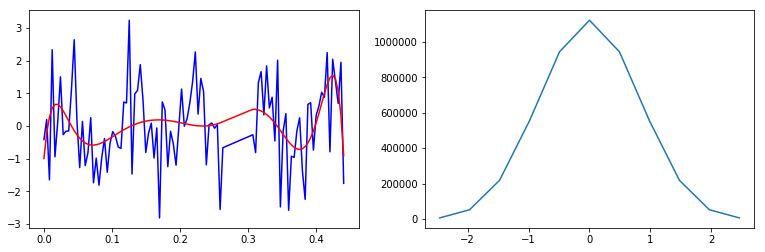

In [26]:
times = np.load("times_outlier.npy")
data = np.load("data_outlier.npy")
nyq = 2.46 # from the NyquistFreq.
F = fourier_dictionary(times, nyq)
Finv = np.linalg.pinv(F)
f = get_all_k(times, nyq)
f_data = np.dot(Finv, data)
data_back = np.dot(F, f_data)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 4))
ax2.plot(f, abs(f_data))
ax1.plot(times, data, 'b')
ax1.plot(times, data_back.real, 'r')
# pgram = lombscargle(times, data, f[1:len(times)])
# normval = times.shape[0]
# plt.figure()
# plt.plot(f[1:len(times)], np.sqrt(4*(pgram/normval)))
print(F.shape)

In [8]:
times = np.load("times_slight.npy")
data = np.load("data_slight.npy")
F = fourier_dictionary(nyq, N, times, real=real)
# Finv = np.linalg.pinv(F)
# f_data = Finv.dot(data)
# data_back = F.dot(f_data)
# fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 4))
# ax2.plot(get_all_k(len(data), real=real)[:int(len(times)/2)], f_data[:int(len(times)/2)].real)
# ax1.plot(times, data, 'b')
# ax1.plot(times, data_back.real, 'r')

for row in F:
    print(' '.join(map(str,row)))

(1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j) (1+0j)
(1+0j) (0.9999990475840499+0.0013801561480591103j) (0.9999961903380139+0.002760309667152763j) (0.9999914282673346+0.0041404579283205074j) (0.9999847613810828+0.0055205983026119084j) (0.999976189691958+0.006900728161091555j) (0.9999657132162876+0.008280844874844068j) (0.9999533319740277+0.00966094581

TypeError: only size-1 arrays can be converted to Python scalars

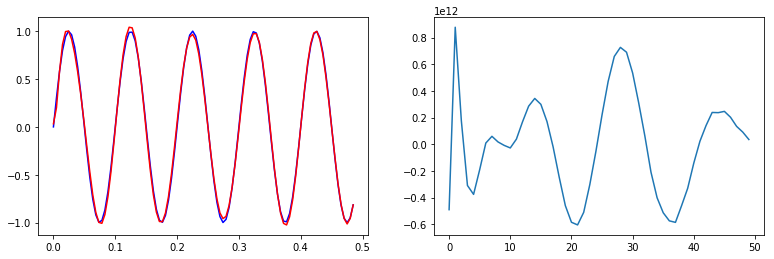

In [174]:
real = False
times_t = np.load("times_template.npy")
data_t = np.load("data_template.npy")
F_t = fourier_dictionary(nyq, N, times_t, real=real)
Finv_t = np.linalg.pinv(F_t)
f_data_t = Finv_t.dot(data_t)
data_back_t = F_t.dot(f_data_t)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 4))
ax2.plot(get_all_k(len(data_t), real=real)[:int(len(times_t)/2)], f_data_t[:int(len(times_t)/2)].real)
ax1.plot(times_t, data_t, 'b')
ax1.plot(times_t, data_back_t.real, 'r')

k = -M//2 + np.arange(M)


[[ 1.        +0.        j  1.        +0.        j  1.        +0.        j
   1.        +0.        j  1.        +0.        j  1.        +0.        j
   1.        +0.        j  1.        +0.        j  1.        +0.        j
   1.        +0.        j]
 [ 1.        +0.        j -0.99995541+0.00944352j  0.99982164-0.01888621j
  -0.9995987 +0.02832721j  0.99928662-0.03776568j -0.99888542-0.04720078j
   0.99928662+0.03776568j -0.9995987 -0.02832721j  0.99982164+0.01888621j
  -0.99995541-0.00944352j]
 [ 1.        +0.        j -0.31917809-0.94769475j -0.7962507 +0.6049668 j
   0.82746964+0.56151046j  0.26803034-0.96341047j -0.99856846-0.05348857j
   0.26803034+0.96341047j  0.82746964-0.56151046j -0.7962507 -0.6049668 j
  -0.31917809+0.94769475j]
 [ 1.        +0.        j  0.99982164-0.01888621j  0.99928662-0.03776568j
   0.99839514-0.05663168j  0.99714751-0.07547747j  0.99554417+0.09429635j
   0.99714751+0.07547747j  0.99839514+0.05663168j  0.99928662+0.03776568j
   0.99982164+0.01888621j]
 [ 1

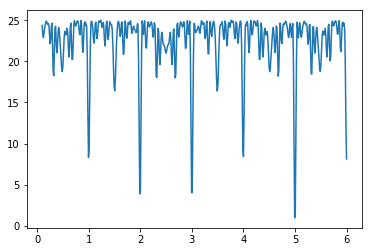

In [10]:
times = np.array([0, 1.5, 1.7, 3, 4, 5, 6, 8, 9, 9.5])
values = np.array([0, 0.3, 0.8, 1, 0.7, 0.82, 0.74, 0.5, 0.3, 0])
# SS function
class Ss:
    def __init__(self, nu_range=[0.1, 6], N_nu=500):
        self.N_nu = N_nu
        self.nu_range = nu_range
    
    def SS_sum(self, nu, N, time):
        sum_value = 0
        for l in range(N-1):
            for k in range(l+1, N):
                sum_value += (np.sin(2 * np.pi * nu * (time[k] - time[l]))) ** 2
        return sum_value

    def SS_function(self, time):
        SS_values = []
        nu_values = np.linspace(self.nu_range[0], self.nu_range[1], self.N_nu)
        N = len(time)
        for nu in nu_values:
            SS_values.append(self.SS_sum(nu, N, time))
        idx_min = np.argmin(SS_values)
        return nu_values, SS_values

def get_nyquist(SS_values, nu_values):
    idx_min = np.argmin(SS_values)
    return nu_values[idx_min]

ss_class = Ss()
nu, ss = ss_class.SS_function(times)
plt.plot(nu, ss)
nyq = get_nyquist(ss, nu)
N = len(times)
# nyq = 1
F = fourier_dictionary(nyq, N, times)
print(F)
# Finv = np.linalg.pinv(F)
# f_data = Finv.dot(values)
# data_back = F.dot(f_data)
# plt.figure()
# plt.plot(times, values, 'b')
# plt.plot(times, data_back.real, 'r')

In [9]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

In [58]:
n_components, n_features = 512, 100
n_nonzero_coefs = len(times)
y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)

idx, = w.nonzero()
print(X.shape)

(100, 512)


(10, 10)


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/omp.py:385: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


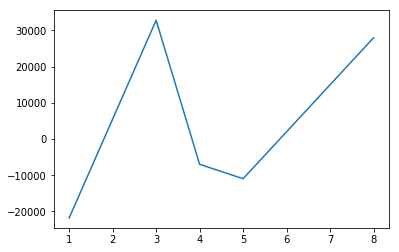

In [20]:
n_components, n_features = 512, 100
n_nonzero_coefs = len(values)
F = fourier_dictionary(nyq, N, times, real=False)
print(F.shape)
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(F, values)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.plot(idx_r, coef[idx_r])

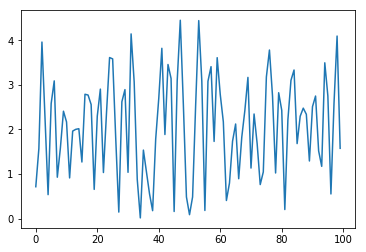

In [115]:
a = omp.predict(Finv)
plt.plot(abs(a))

In [76]:
a = np.array([1, 2, 3])
b = np.array([3, 3])
M = a * b[:, np.newaxis]
c = np.array([2, 2, 2])
M.dot(c)
M.shape

(2, 3)

In [106]:
# generate a grid
npts = 64
domain = np.linspace(0, 1, npts)

# generate a dictionary and manufactured solution
X = np.array([np.cos(2 * np.pi * m * domain) for m in range(4)]).T
coef = [0., 1., 0., .5]
y = np.dot(X, coef)

In [108]:
X

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  0.99503078,  0.98017249,  0.95557281],
       [ 1.        ,  0.98017249,  0.92147621,  0.82623877],
       [ 1.        ,  0.95557281,  0.82623877,  0.6234898 ],
       [ 1.        ,  0.92147621,  0.69823682,  0.36534102],
       [ 1.        ,  0.87822157,  0.54254626,  0.07473009],
       [ 1.        ,  0.82623877,  0.36534102, -0.22252093],
       [ 1.        ,  0.76604444,  0.17364818, -0.5       ],
       [ 1.        ,  0.69823682, -0.02493069, -0.73305187],
       [ 1.        ,  0.6234898 , -0.22252093, -0.90096887],
       [ 1.        ,  0.54254626, -0.4112871 , -0.98883083],
       [ 1.        ,  0.45621066, -0.58374367, -0.98883083],
       [ 1.        ,  0.36534102, -0.73305187, -0.90096887],
       [ 1.        ,  0.27084047, -0.85329088, -0.73305187],
       [ 1.        ,  0.17364818, -0.93969262, -0.5       ],
       [ 1.        ,  0.07473009, -0.98883083, -0.22252093],
       [ 1.        , -0.

In [21]:
np.linspace(0, 5 * 0.2, 6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])